<a href="https://colab.research.google.com/github/htharshht/OIBSIP/blob/main/UNEMPLOYMENT_ANALYSIS_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

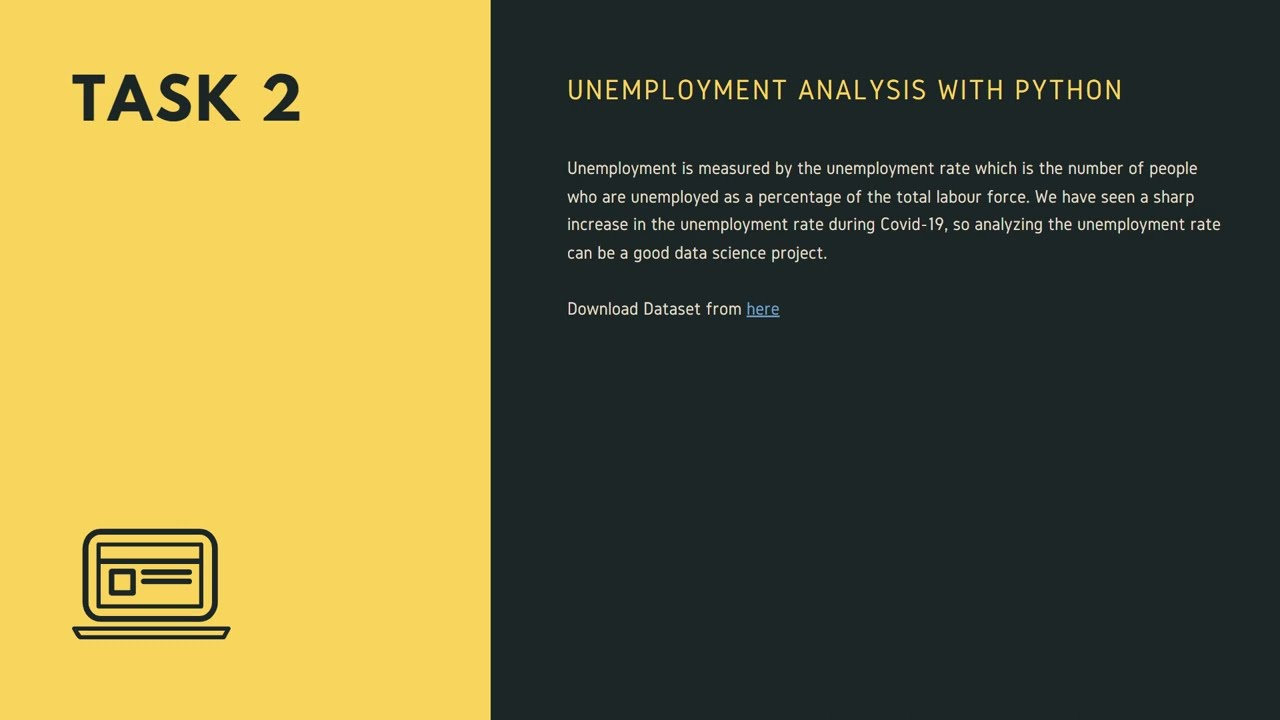

# **Project Name:** Unemployment Rate

**Project Type:** EDA

**Author:** Harshit Tiwari

Visit my **[GitHub](https://github.com/htharshht)**

**DataSet:** [Unemployment in India](https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india)

# **Project Summary:**  
*Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so in this project we will be analyzing the unemployment rate.*

In [ ]:
# Importing necessary libraries needed in EDA
import numpy as np
import pandas as pd
import datetime
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px        # will be used for plotting

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EDA Data Set/Unemployment in India.csv')

In [ ]:
df.shape

(768, 7)

# **Dataset Firstview**

In [ ]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# first 5 rows 
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# last 5 rows
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# *Dataset Rows & Columns count*

In [ ]:
# Dataset Rows & Columns count
print(f'Number of rows : {len(df.axes[0])}')
print(f'Number of rows : {len(df.axes[1])}')

Number of rows : 768
Number of rows : 7


# *Dataset Information*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


*Date column is object type, we will change it to datetime later.*

In [ ]:
# checking the duplicate values
df.duplicated().sum()

27

There are 27 duplicate values.

In [ ]:
# dropping the duplicate values
df.drop_duplicates(inplace = True)

In [ ]:
df.shape    # checking the shape after dropping duplicates

(741, 7)

In [ ]:
# dataste columns
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

*There are unwanted spaces in our dataset's column name, we will remove them later by renaming them.*

In [ ]:
# dataset describe
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
# counting missing / null values
df.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

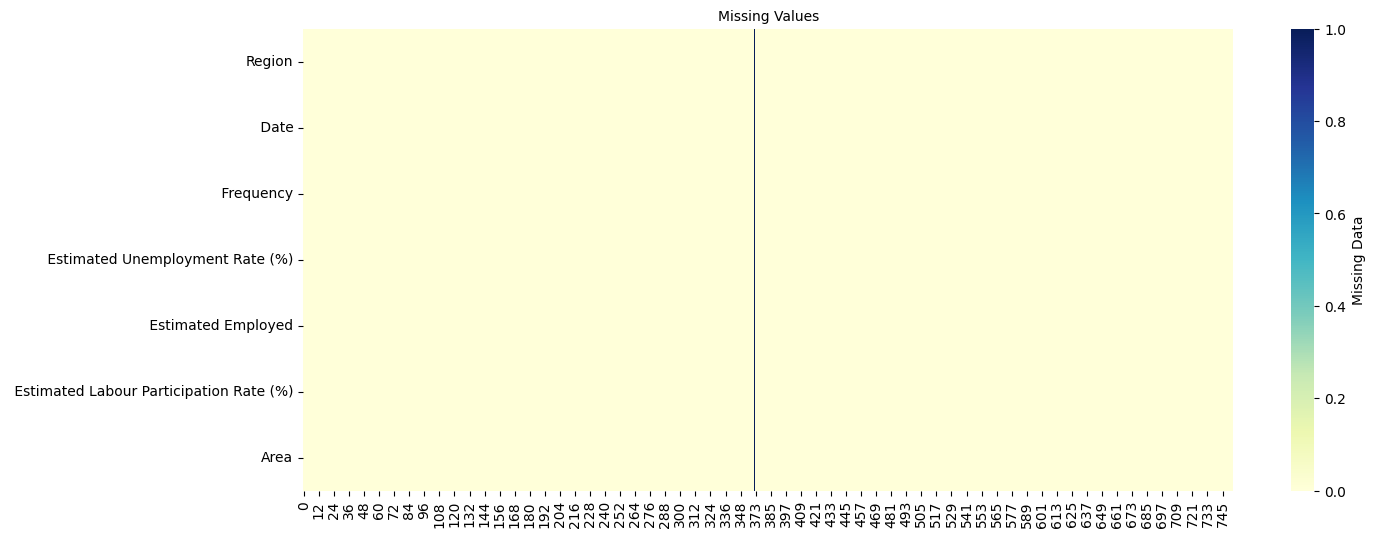

In [ ]:
# visualizing the missing vales
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values', fontsize = 10)
plt.show()

# **What did I find about the dataset?**

1) There are 768 rows and 7 columns in the dataset but after dropping the duplicates it's 741 rows and 7 columns.

2) There are null values in every columns.


# **Check Unique Values for each variable.**

In [ ]:
# cecking unique values in each column.
pd.Series({col:df[col].unique() for col in df})           # creating a series consisting every column name of the dataset and it's value.
                                                                # used for loop to iterate over every column in the dataset

Region                                      [Andhra Pradesh, Assam, Bihar, Chhattisgarh, D...
 Date                                       [ 31-05-2019,  30-06-2019,  31-07-2019,  31-08...
 Frequency                                                           [ Monthly, nan, Monthly]
 Estimated Unemployment Rate (%)            [3.65, 3.05, 3.75, 3.32, 5.17, 3.52, 4.12, 4.3...
 Estimated Employed                         [11999139.0, 11755881.0, 12086707.0, 12285693....
 Estimated Labour Participation Rate (%)    [43.24, 42.05, 43.5, 43.97, 44.68, 43.01, 41.0...
Area                                                                      [Rural, nan, Urban]
dtype: object

# **Data Cleaning.**

In [ ]:
# creating a copy of the dataset before cleaning.
df1 = df.copy()

In [ ]:
df1.shape

(741, 7)

In [ ]:
# new dataset without Nan values
df_new = df1.dropna()

In [ ]:
# checking the null values after dropping them
df_new.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
# removing the unnecessary spaces from column names by renaming them
df_new = df_new.rename(columns={' Date': 'Date', ' Frequency': 'Frequency', ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                       ' Estimated Employed': 'Estimated Employed', ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)',
                       })

In [ ]:
# changing the type of Date column to datetime from object
df_new['Date'] = pd.to_datetime(df_new['Date'])

In [ ]:
# changing datatype of floats to int
df_new['Estimated Unemployment Rate (%)'] = df_new['Estimated Unemployment Rate (%)'].astype(int)
df_new['Estimated Employed'] = df_new['Estimated Employed'].astype(int)
df_new['Estimated Labour Participation Rate (%)'] = df_new['Estimated Labour Participation Rate (%)'].astype(int)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    int64         
 4   Estimated Employed                       740 non-null    int64         
 5   Estimated Labour Participation Rate (%)  740 non-null    int64         
 6   Area                                     740 non-null    object        
 7   Day                                      740 non-null    int64         
 8   Month                                    740 non-null    object        
 9   Year                                     74

In [ ]:
# creating new columns for Day, Month and Year
df_new['Day'] = df_new['Date'].dt.day
df_new['Month'] = df_new['Date'].dt.month_name()
df_new['Year'] = df_new['Date'].dt.year

In [ ]:
# checking the top 5 rows of new dataset
df_new.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3,11999139,43,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3,11755881,42,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3,12086707,43,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3,12285693,43,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5,12256762,44,Rural,30,September,2019


In [ ]:
# checking bottom 5 rows of new dataset
df_new.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
749,West Bengal,2020-02-29,Monthly,7,10871168,44,Urban,29,February,2020
750,West Bengal,2020-03-31,Monthly,6,10806105,43,Urban,31,March,2020
751,West Bengal,2020-04-30,Monthly,15,9299466,41,Urban,30,April,2020
752,West Bengal,2020-05-31,Monthly,15,9240903,40,Urban,31,May,2020
753,West Bengal,2020-06-30,Monthly,9,9088931,37,Urban,30,June,2020


1) I dropped the rows containing Nan values.

2) Created a new dataset having no Nan values.

3) Converted Date column type to datetime from object type.

4) Created new columns for Day, Month and Year from Date column.

5) Converted all the float type data to int.

Now dataset is ready to be analyzed and visualized.

# **Data Visualization and story telling.**

Problem - 1

***Which Region has highest Unemployment rate?***

In [ ]:
# counting the unique values in each region
unemployment_rate = df_new['Region'].value_counts()
unemployment_rate

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [ ]:
#extarcting each regionname
region_name = df_new.Region.unique()
region_name

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [ ]:
# creating a dataset of region name and their value count
region_df = pd.DataFrame(zip(region_name,unemployment_rate), columns=['region name', 'unemployment rate'])
region_df

,region name,unemployment rate
0,Andhra Pradesh,28
1,Assam,28
2,Bihar,28
3,Chhattisgarh,28
4,Delhi,28
5,Goa,28
6,Gujarat,28
7,Haryana,28
8,Himachal Pradesh,28
9,Jammu & Kashmir,28


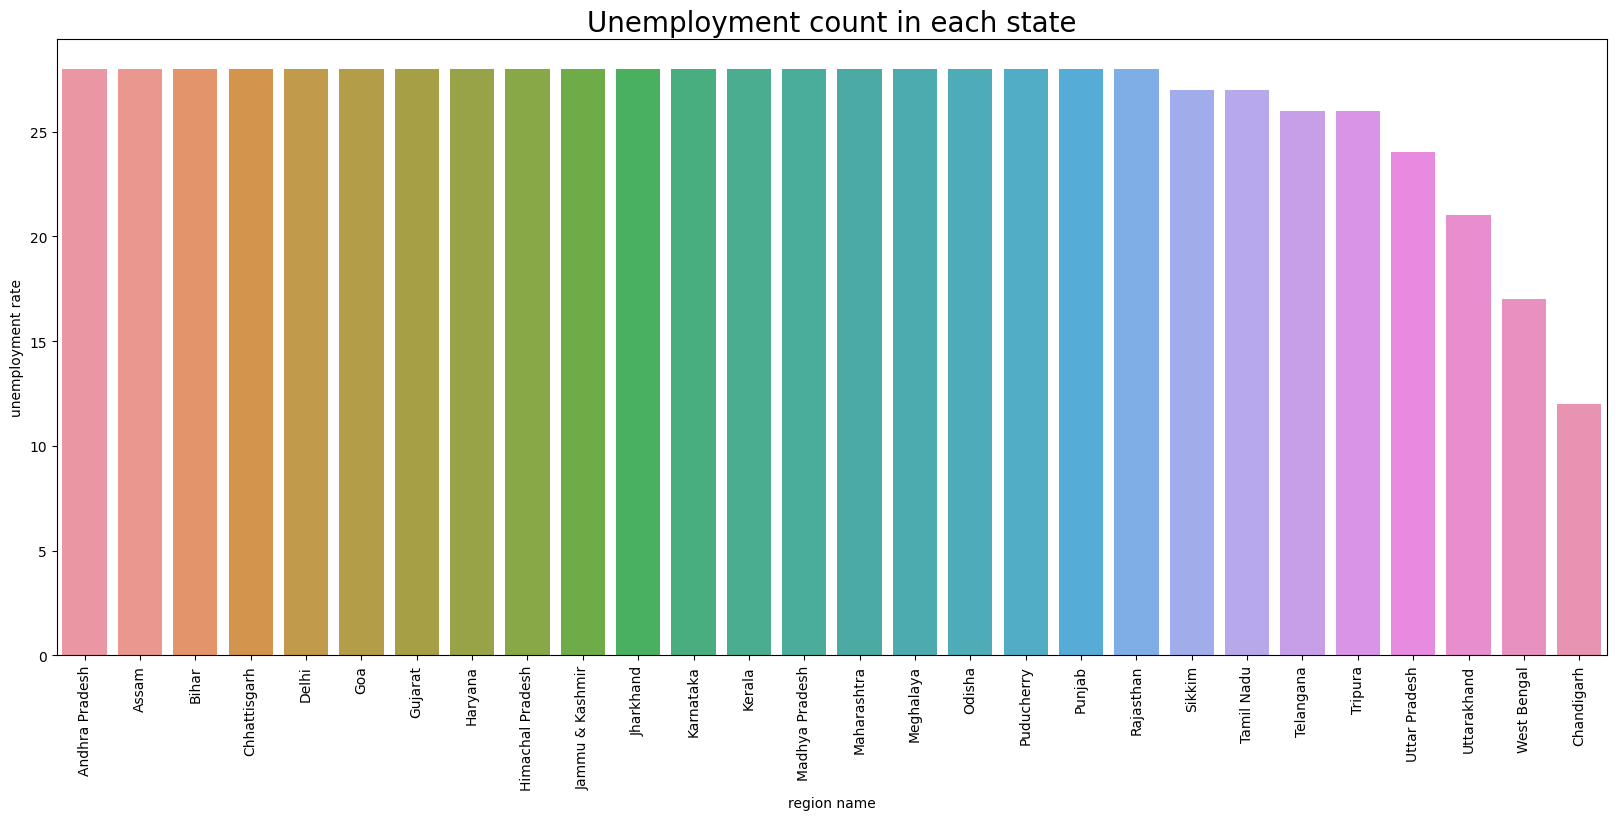

In [ ]:
# visualzing in a barplot
plt.figure(figsize=(20,8))
sns.barplot(data=region_df, x='region name', y='unemployment rate')
plt.xticks(rotation='vertical')
plt.title('Unemployment count in each state', fontsize=20)
plt.show()

Problem - 2 

**Which area had highest percentage of unemployment rate?**

In [ ]:
# Counting each area
area_count = df_new.Area.value_counts()
area_count

Urban    381
Rural    359
Name: Area, dtype: int64

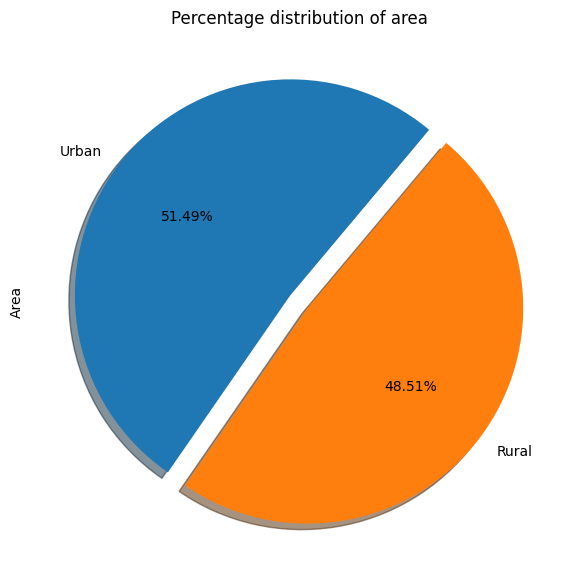

In [ ]:
# Visualizing area_count in a pie chart
area_count.plot.pie(figsize=(9,7), autopct='%1.2f%%', shadow=True, explode=(0.05,0.05), startangle=50, fontsize=10)
plt.title('Percentage distribution of area')
plt.show()

Problem - 3

***Which year had the highest unemployment rate in each year?***

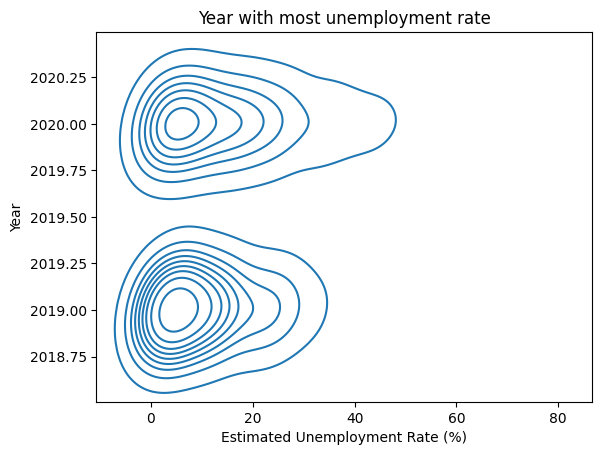

In [ ]:
# Visualizing in a 2d plot
sns.kdeplot(x=df_new['Estimated Unemployment Rate (%)'],y=df_new['Year'])
plt.title('Year with most unemployment rate')
plt.show()

*We can clealy see that unemployment rate increased in 2020 in comparison to 2018-19.*

Problem - 4

***Which month had the highest unemployment rate in each year?***

In [ ]:
# counting the unique values in each Month
month_count = df_new['Month'].value_counts()
month_name = df_new.Month.unique()
# creating a datframe of month name and their count
month_df = pd.DataFrame(zip(month_name,month_count),columns=['Month Name', 'Month Count'])
month_df

,Month Name,Month Count
0,May,105
1,June,104
2,July,55
3,August,55
4,September,54
5,October,53
6,November,53
7,December,53
8,January,53
9,February,52


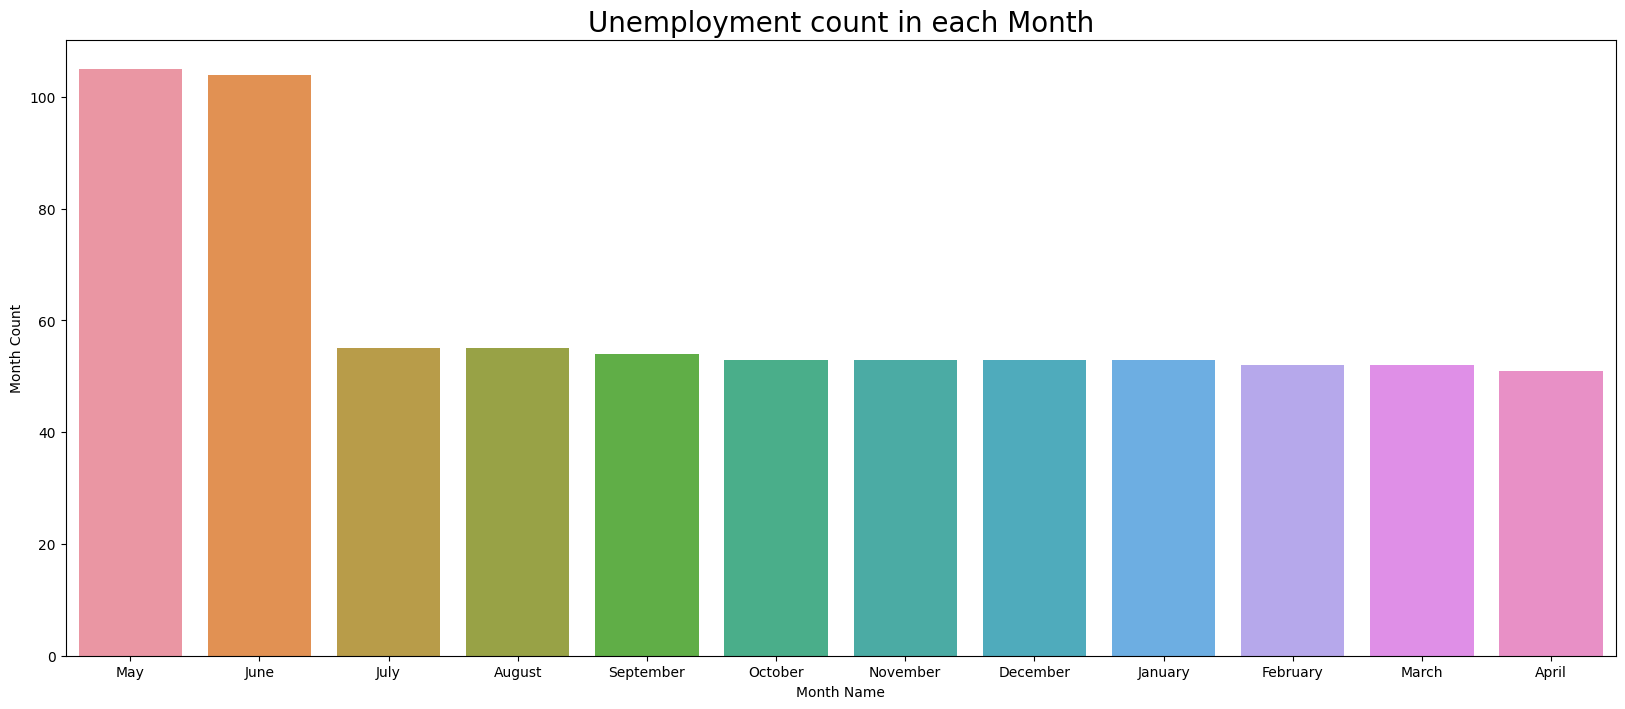

In [ ]:
# visualzing in a barplot
plt.figure(figsize=(20,8))
sns.barplot(data=month_df, x='Month Name', y='Month Count')
plt.title('Unemployment count in each Month', fontsize=20)
plt.show()

*Month May and June had highest number unemploment respectively.*

Problem - 5 

**What was the estimated labour participation in each region?**

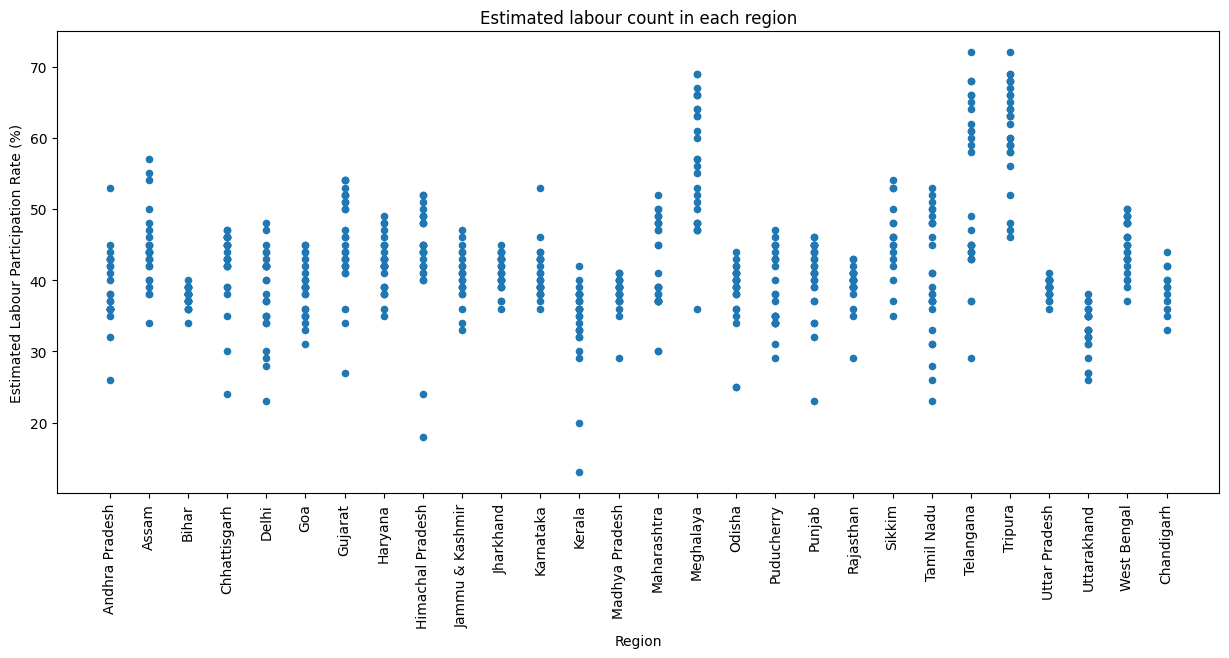

In [ ]:
df_new.plot(kind='scatter', x='Region', y= 'Estimated Labour Participation Rate (%)', figsize=(15,6))
plt.xticks(rotation='vertical')
plt.title('Estimated labour count in each region')
plt.show()

# **Correlation Heatmap**

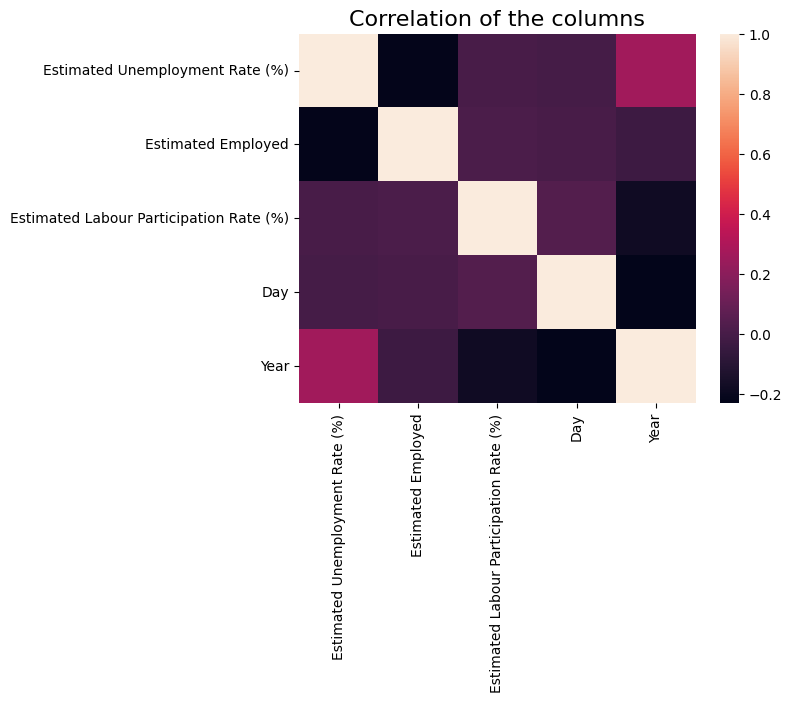

In [ ]:
# checking the correlation between columns
sns.heatmap(df_new.corr(numeric_only=True))
plt.title('Correlation of the columns',fontsize=16)
plt.show()

# **Creating a pairplot to see relations between each columns.**

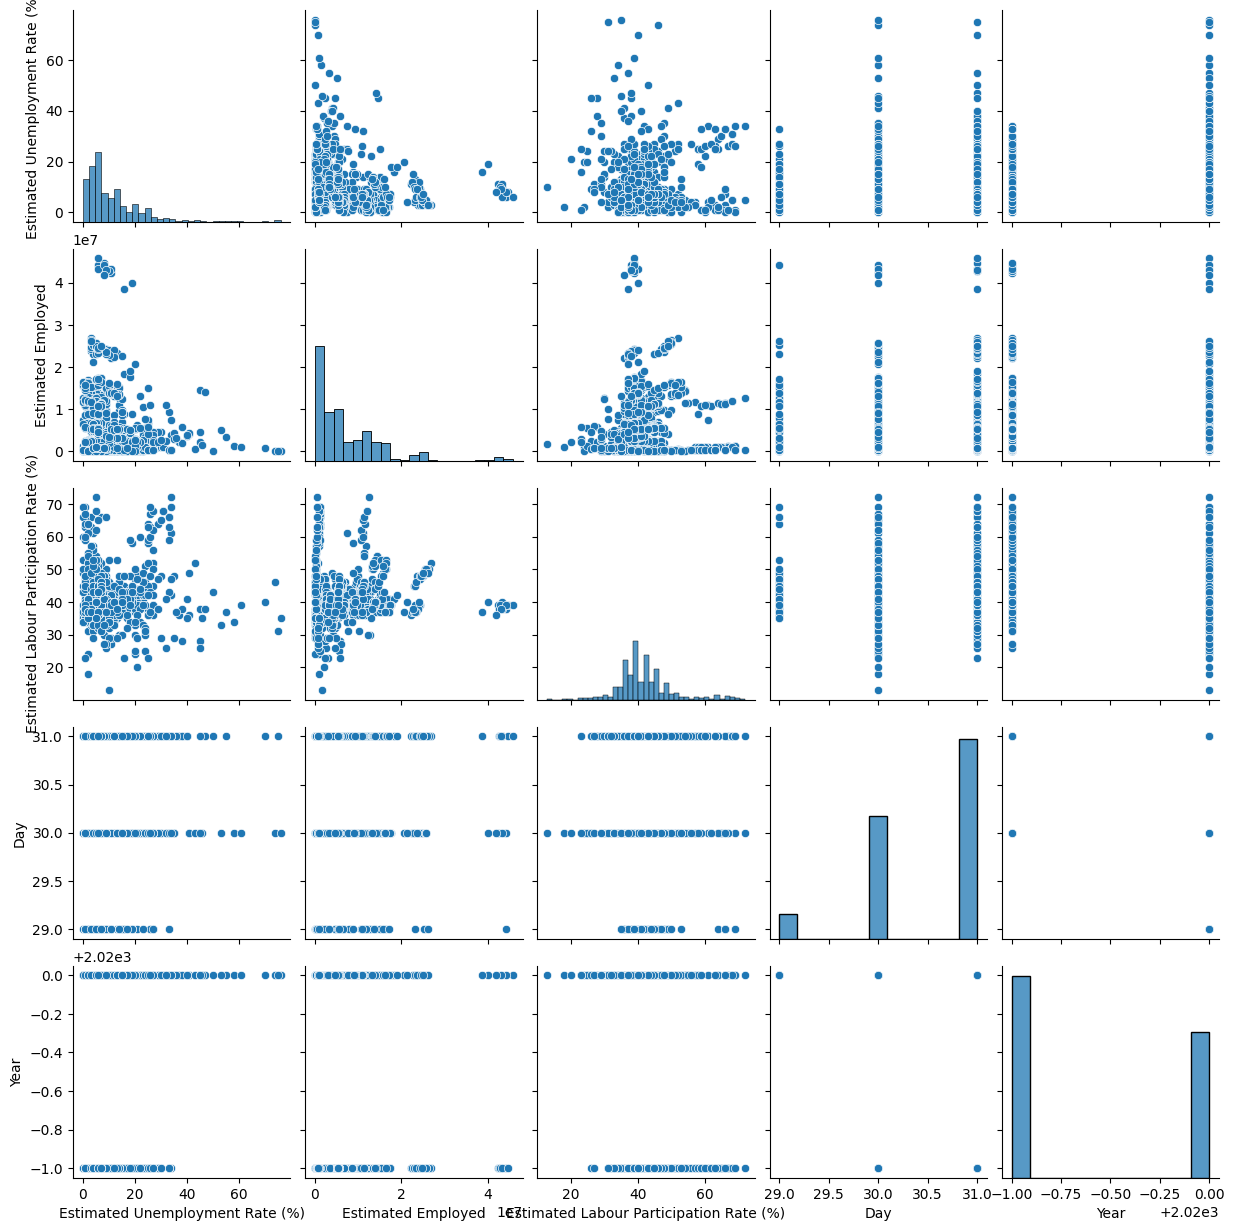

In [ ]:
# creating a pairplot of the columns
sns.pairplot(df_new)
plt.show()

# ***Findings:***

1) Found out that Chandigarh region had lowest rate of unemployment rate.

2) Urban area had higher unemployment rate in comparison of Rural area.

3) Unemployment rate increased in 2020 because of Covid-19 lockdown.

4) May & June months had highest unemployment rate respectively than other months.

5) Telanagana region had highest Labour participation rate.